# **Question 1: XOR Gate Classification**
**2: Implement the following:**<br/>
(Implementation 5 marks and Visualization and documentation 5 marks)


In [ ]:
# Step 1: creating xor's truthtabel

import numpy as np
import pandas as pd

data = {
    'A': [0, 0, 1, 1],
    'B': [0, 1, 0, 1],
    'Output': [0, 1, 1, 0]
}

# Create DataFrame
xor_df = pd.DataFrame(data)
print(xor_df)


   A  B  Output
0  0  0       0
1  0  1       1
2  1  0       1
3  1  1       0


In [ ]:
# Step 2: Implement the Single Layer Perceptron using MCP Neuron

class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.threshold = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.threshold = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) - self.threshold
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.threshold -= update  # update threshold

    def activation_function(self, x):
        return 1 if x >= 0 else 0  # Step function

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.threshold
        return [self.activation_function(x) for x in linear_output]

# Prepare data
X = xor_df[['A', 'B']].values
y = xor_df['Output'].values

# Train Single Layer Perceptron
slp = SingleLayerPerceptron(learning_rate=0.1, epochs=10)
slp.fit(X, y)

# Predictions
predictions = slp.predict(X)
print("Predictions:", predictions)


Predictions: [1, 1, 0, 0]


In [ ]:
# Step 3: Observe and discuss the perceptron's performance

for i in range(len(y)):
    print(f"Input: {X[i]} | True Output: {y[i]} | Predicted Output: {predictions[i]}")

    #discussions
print("\nDiscussion:")
print("The Single Layer Perceptron fails to classify the XOR output correctly because it is not able to separate the classes linearly.")


Input: [0 0] | True Output: 0 | Predicted Output: 1
Input: [0 1] | True Output: 1 | Predicted Output: 1
Input: [1 0] | True Output: 1 | Predicted Output: 0
Input: [1 1] | True Output: 0 | Predicted Output: 0

Discussion:
The Single Layer Perceptron fails to classify the XOR output correctly because it is not able to separate the classes linearly.


In [ ]:
# Step 4: Implement XOR using Multi-Layer Perceptron

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mlp = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, activation='relu', solver='adam')
mlp.fit(X, y)

# Predictions
mlp_predictions = mlp.predict(X)
accuracy = accuracy_score(y, mlp_predictions)

# Display results
print("MLP Predictions:", mlp_predictions)
print("Accuracy of MLP:", accuracy)


MLP Predictions: [1 1 1 1]
Accuracy of MLP: 0.5


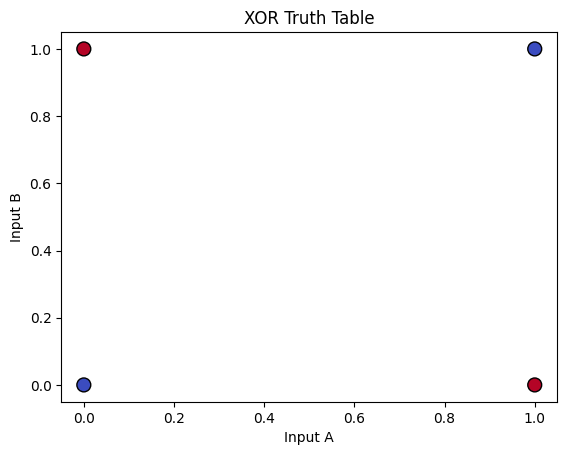

In [ ]:
import matplotlib.pyplot as plt

# Visualize the XOR dataset
def plot_xor_data():
    plt.scatter(xor_df['A'], xor_df['B'], c=xor_df['Output'], cmap='coolwarm', s=100, edgecolors='k')
    plt.title('XOR Truth Table')
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    plt.show()

plot_xor_data()


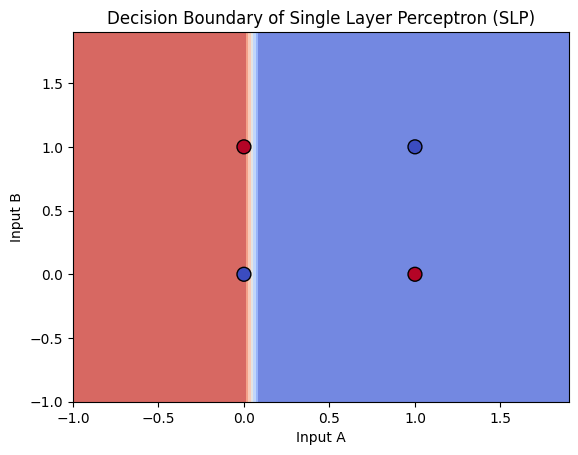

In [ ]:
def plot_decision_boundary(X, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Get predictions for each point in the meshgrid
    Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel('Input A')
    plt.ylabel('Input B')
    plt.show()

# Plot decision boundary for Single Layer Perceptron
plot_decision_boundary(X, slp, 'Decision Boundary of Single Layer Perceptron (SLP)')


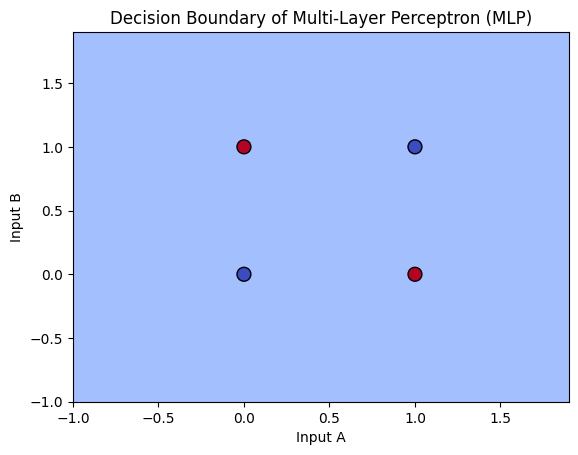

In [ ]:
# Plot decision boundary for Multi-Layer Perceptron
plot_decision_boundary(X, mlp, 'Decision Boundary of Multi-Layer Perceptron (MLP)')


# **Question 2:**

A. Sentiment Analysis Twitter Airline

In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('./2.csv')

# Check the data
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
# Drop unnecessary columns and check for missing values
df = df[['text', 'airline_sentiment']].dropna()

# Convert sentiment to binary labels (positive = 1, negative = 0)
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['text']).toarray()

# the given Target variable
y = df['airline_sentiment'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Import Keras for building the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the neural network model
def create_model(activation_function='sigmoid'):
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation=activation_function))  # Hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy']) #this is for backpropogation using ADAM
    return model

# Create the model with Sigmoid activation for demonstration
model = create_model(activation_function='sigmoid')

# Display the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          16,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,033 (62.63 KB)

 Trainable params: 16,033 (62.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8369 - loss: 0.4457 - val_accuracy: 0.8432 - val_loss: 0.4007
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8367 - loss: 0.4005 - val_accuracy: 0.8432 - val_loss: 0.3647
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8363 - loss: 0.3601 - val_accuracy: 0.8528 - val_loss: 0.3225
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8560 - loss: 0.3098 - val_accuracy: 0.8794 - val_loss: 0.2875
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8769 - loss: 0.2771 - val_accuracy: 0.8962 - val_loss: 0.2635
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.2561 - val_accuracy: 0.9061 - val_loss: 0.2481
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9073 - loss: 0.2308 - val_accuracy: 0.9081 - val_loss: 0.2385
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - loss: 0.2181 - val_accuracy: 0.

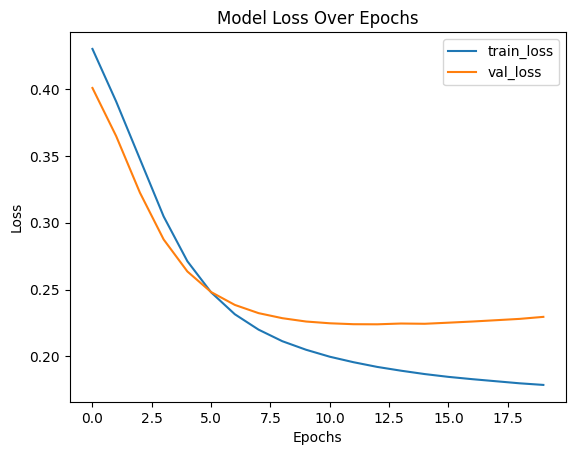

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Plot the loss over epochs
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 91.63%


In [ ]:
# Create and train model with ReLU
model_relu = create_model(activation_function='relu')
history_relu = model_relu.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Create and train model with Tanh
model_tanh = create_model(activation_function='tanh')
history_tanh = model_tanh.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8128 - loss: 0.5301 - val_accuracy: 0.8692 - val_loss: 0.3116
Epoch 2/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.2895 - val_accuracy: 0.9068 - val_loss: 0.2410
Epoch 3/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9117 - loss: 0.2223 - val_accuracy: 0.9180 - val_loss: 0.2251
Epoch 4/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9216 - loss: 0.2055 - val_accuracy: 0.9184 - val_loss: 0.2232
Epoch 5/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9284 - loss: 0.1822 - val_accuracy: 0.9180 - val_loss: 0.2222
Epoch 6/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9264 - loss: 0.1870 - val_accuracy: 0.9160 - val_loss: 0.2244
Epoch 7/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9345 - loss: 0.1788 - val_accuracy: 0.9153 - val_loss: 0.2268
Epoch 8/20
366/366 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9361 - loss: 0.1750 - val_accuracy: 0.